In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
#import statsmodels.api as sm
#import itertools as it
#from statsmodels.sandbox.stats.multicomp import multipletests
#from itertools import compress
from pyBedGraph import BedGraph
from pybedtools import BedTool
import scipy.stats

In [2]:
def read_cf(directory, file_name):
    with open(directory + file_name) as f:
        chrom = {}
        for line in f:
            tmp = line.strip().split("\t")
            if tmp[0] != 'chrM':
                chrom[tmp[0]] = int(tmp[1])
    return chrom

In [16]:
def read_peak(directory, file_name):
    with open(directory + file_name) as f:
        lanch = []
        ranch = []
        load = []
        for line in f:
            tmp = line.strip().split("\t")
            lanch.append([tmp[0], int(tmp[1]), int(tmp[2]), tmp[6]])
            ranch.append([tmp[3], int(tmp[4]), int(tmp[5]), tmp[6]])
            load.append([tmp[7], int(tmp[8]), int(tmp[9])])
    return lanch, ranch, load

In [120]:
def plot_boxplot(dataset, dlabel, clr, tit, ylab, fig_name):
    fig = plt.figure(figsize = (8,6))
    medianprops = dict(linewidth = 3, color=clr)
    i=0
    boxprops = dict(linewidth = 1.5)
    toplot = [np.asarray([]) for i in range(len(dataset))]
    for d in dataset:
        #medianprops = dict(linewidth = 3, color=colcode[i])
        datax = toplot
        datax[i] = np.asarray(dataset[i])
        plt.boxplot(datax, widths = 0.6, medianprops = medianprops, boxprops = boxprops)
        i +=1
    plt.xticks([i for i in range(1, len(dataset)+1)], dlabel, fontsize = 18)
    plt.yticks(fontsize = 18)
    plt.ylabel(ylab, fontsize = 18)
    plt.ylim(bottom=-0.05)
    plt.ylim(top=1.05)
    plt.title(tit, fontsize = 18)
    plt.savefig(fig_name+'.pdf', dpi=150, bbox_inches="tight")
    plt.show()
    plt.close()

In [6]:
def get_cov(interval_list, bgobj):
    tmpvals = []
    for x in interval_list:
        if x[0] != 'chrM':
            value = list(bgobj.stats(stat = 'max', intervals = [x]))
            tmpvals.append(max(0, value[0]))
    return tmpvals

In [7]:
def write_result(directory, out_list, out_name):
    with open(directory+out_name, 'a') as file1:
        for i in range(len(out_list)):
            file1.write('\t'.join(map(str, out_list[i])) + '\n')
    file1.close()

In [175]:
directory='/Users/kimm/Desktop/GM12878_files/'
wapl_cov='CHG0032.q30.nr.sorted.bedgraph'
nipbl_cov='CHG0030.q30.nr.sorted.bedgraph'
ctcf_cov='LHG0052H.for.BROWSER.sorted.bedgraph'
cohesin_cov='LHG0051H_0104V.for.BROWSER.sorted.bedgraph'
rnapii_cov='LHG0035N_0035V_0045V.for.BROWSER.sorted.bedgraph'
ctcfcd_cov='GM12878-CTCF-pooled_comp_sing_FDR_0.2_PASS.bedgraph'
cohesincd_cov='GM12878-cohesin-pooled_comp_sing_FDR_0.2_PASS.bedgraph'
rnapiicd_cov='GM12878-RNAPII-pooledv2_comp_sing_FDR_0.2_PASS.bedgraph'
peak_file='convloops_anch_loading.bedpe'

In [9]:
chromfile = read_cf(directory, 'hg38.chrom.sizes')
#repet = BedTool(directory+'hg38PAM.sameChr.tx.sorted.legal.6To12Copies.within5kb_col1-4.bed')

In [179]:
lanch, ranch, load = read_peak(directory, peak_file)

In [10]:
bgwapl = BedGraph(directory+'hg38.chrom.sizes', directory+wapl_cov)

In [11]:
bgnipbl = BedGraph(directory+'hg38.chrom.sizes', directory+nipbl_cov)

In [12]:
bgctcf = BedGraph(directory+'hg38.chrom.sizes', directory+ctcf_cov)

In [13]:
bgcohesin = BedGraph(directory+'hg38.chrom.sizes', directory+cohesin_cov)

In [14]:
bgrnapii = BedGraph(directory+'hg38.chrom.sizes', directory+rnapii_cov)

In [176]:
bgctcfcd = BedGraph(directory+'hg38.chrom.sizes', directory+ctcfcd_cov)

In [177]:
bgcohesincd = BedGraph(directory+'hg38.chrom.sizes', directory+cohesincd_cov)

In [178]:
bgrnapiicd = BedGraph(directory+'hg38.chrom.sizes', directory+rnapiicd_cov)

In [180]:
for key,val in chromfile.items():
    bgwapl.load_chrom_data(key)
    bgnipbl.load_chrom_data(key)
    bgctcf.load_chrom_data(key)
    bgcohesin.load_chrom_data(key)
    bgrnapii.load_chrom_data(key)
    bgctcfcd.load_chrom_data(key)
    bgcohesincd.load_chrom_data(key)
    bgrnapiicd.load_chrom_data(key)

In [182]:
for n in [bgwapl, bgnipbl, bgctcf, bgcohesin, bgrnapii, bgctcfcd, bgcohesincd, bgrnapiicd]:
    lanchor_vals = get_cov([[x[0],x[1], x[2]] for x in lanch], n)
    for i in range(len(lanch)):
        lanch[i].append(lanchor_vals[i])

In [184]:
for n in [bgwapl, bgnipbl, bgctcf, bgcohesin, bgrnapii, bgctcfcd, bgcohesincd, bgrnapiicd]:
    ranchor_vals = get_cov([[x[0],x[1], x[2]] for x in ranch], n)
    for i in range(len(ranch)):
        ranch[i].append(ranchor_vals[i])

In [185]:
for n in [bgwapl, bgnipbl, bgctcf, bgcohesin, bgrnapii, bgctcfcd, bgcohesincd, bgrnapiicd]:
    load_vals = get_cov([[x[0],x[1], x[2]] for x in load], n)
    for i in range(len(load)):
        load[i].append(load_vals[i])

In [187]:
write_result(directory, lanch, 'convloops_lanch_wapl-nipbl-ctcfcp-cohesincp-rnapiicp-ctcfcd-cohesincd-rnapiicd.bed')

In [188]:
write_result(directory, ranch, 'convloops_ranch_wapl-nipbl-ctcfcp-cohesincp-rnapiicp-ctcfcd-cohesincd-rnapiicd.bed')

In [189]:
write_result(directory, load, 'convloops_load_wapl-nipbl-ctcfcp-cohesincp-rnapiicp-ctcfcd-cohesincd-rnapiicd.bed')

In [108]:
wapl_anch = []
wapl_load = []
for i in range(len(lanch)):
    x1=lanch[i][4]
    x3=ranch[i][4]
    x2=load[i][3]
    wapl_anch.append((x1+x3)/(x1+x3+2*x2))
    wapl_load.append((2*x2)/(x1+x3+2*x2))

In [125]:
nipbl_anch = []
nipbl_load = []
for i in range(len(lanch)):
    x1=lanch[i][5]
    x3=ranch[i][5]
    x2=load[i][4]
    nipbl_anch.append((x1+x3)/(x1+x3+2*x2))
    nipbl_load.append((2*x2)/(x1+x3+2*x2))

In [126]:
ctcf_anch = []
ctcf_load = []
for i in range(len(lanch)):
    x1=lanch[i][6]
    x3=ranch[i][6]
    x2=load[i][5]
    ctcf_anch.append((x1+x3)/(x1+x3+2*x2))
    ctcf_load.append((2*x2)/(x1+x3+2*x2))

In [127]:
cohesin_anch = []
cohesin_load = []
for i in range(len(lanch)):
    x1=lanch[i][7]
    x3=ranch[i][7]
    x2=load[i][6]
    cohesin_anch.append((x1+x3)/(x1+x3+2*x2))
    cohesin_load.append((2*x2)/(x1+x3+2*x2))

In [163]:
rnapii_anch = []
rnapii_load = []
for i in range(len(lanch)):
    x1=lanch[i][8]
    x3=ranch[i][8]
    x2=load[i][7]
    rnapii_anch.append((x1+x3)/(x1+x3+2*x2))
    rnapii_load.append((2*x2)/(x1+x3+2*x2))

In [190]:
ctcfcd_anch = []
ctcfcd_load = []
for i in range(len(lanch)):
    x1=lanch[i][9]
    x3=ranch[i][9]
    x2=load[i][8]
    ctcfcd_anch.append((x1+x3)/(x1+x3+2*x2))
    ctcfcd_load.append((2*x2)/(x1+x3+2*x2))

In [191]:
cohesincd_anch = []
cohesincd_load = []
for i in range(len(lanch)):
    x1=lanch[i][10]
    x3=ranch[i][10]
    x2=load[i][9]
    cohesincd_anch.append((x1+x3)/(x1+x3+2*x2))
    cohesincd_load.append((2*x2)/(x1+x3+2*x2))

In [192]:
rnapiicd_anch = []
rnapiicd_load = []
for i in range(len(lanch)):
    x1=lanch[i][11]
    x3=ranch[i][11]
    x2=load[i][10]
    rnapiicd_anch.append((x1+x3)/(x1+x3+2*x2))
    rnapiicd_load.append((2*x2)/(x1+x3+2*x2))

In [164]:
len(rnapii_load)

1108

In [136]:
#x1 = [np.log10(x+1) for x in wapl_anch]
#x2 = [np.log10(x+1) for x in wapl_load]
x1 = wapl_anch
x2 = wapl_load

In [137]:
anchr_stat = scipy.stats.mannwhitneyu(x1, x2)

In [138]:
anchr_title = "WAPL \n  Anchor: median = " + str(round(np.median(wapl_anch), 3)) + "; n = " + str(len(wapl_anch)) + "\n" + "loading: median = " + str(round(np.median(wapl_load), 3)) + "; n = " + str(len(wapl_load)) + "\n" + "Mann-Whitney stat = " + str(anchr_stat[0]) + "; pval = " + str(anchr_stat[1]) 

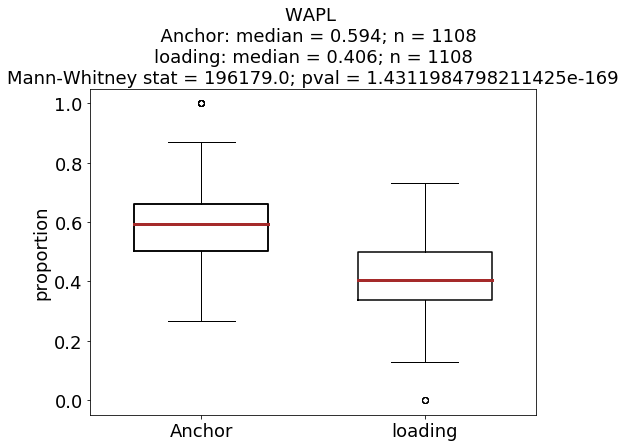

In [139]:
plot_boxplot([x1, x2], ['Anchor', 'loading'], 'brown', anchr_title, 'proportion', 'wapl_anchor_vs_loading_boxplot_norm_20201012')

In [140]:
#x1 = [np.log10(x+1) for x in nipbl_anch]
#x2 = [np.log10(x+1) for x in nipbl_load]
x1 = nipbl_anch
x2 = nipbl_load

In [141]:
anchr_stat = scipy.stats.mannwhitneyu(x1, x2)

In [142]:
anchr_title = "NIPBL \n  Anchor: median = " + str(round(np.median(nipbl_anch), 3)) + "; n = " + str(len(nipbl_anch)) + "\n" + "loading: median = " + str(round(np.median(nipbl_load), 3)) + "; n = " + str(len(nipbl_load)) + "\n" + "Mann-Whitney stat = " + str(anchr_stat[0]) + "; pval = " + str(anchr_stat[1]) 

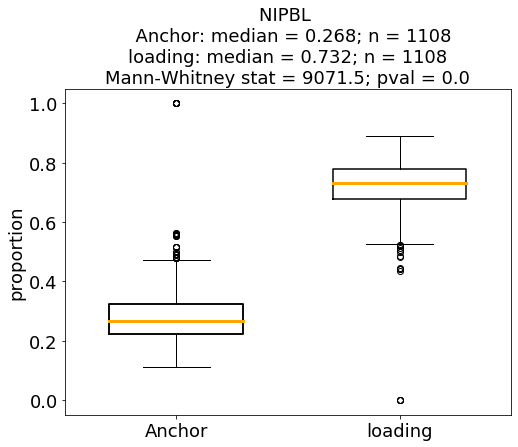

In [143]:
plot_boxplot([x1, x2], ['Anchor', 'loading'], '#FFA500', anchr_title, 'proportion', 'nipbl_anchor_vs_loading_boxplot_norm_20201012')

In [169]:
#x1 = [np.log10(x+1) for x in ctcf_anch]
#x2 = [np.log10(x+1) for x in ctcf_load]
x1 = ctcf_anch
x2 = ctcf_load

In [170]:
anchr_stat = scipy.stats.mannwhitneyu(x1, x2)

In [171]:
anchr_stat

MannwhitneyuResult(statistic=0.0, pvalue=0.0)

In [149]:
anchr_title = "CTCF ChIA-PET \n  Anchor: median = " + str(round(np.median(ctcf_anch), 3)) + "; n = " + str(len(ctcf_anch)) + "\n" + "loading: median = " + str(round(np.median(ctcf_load), 3)) + "; n = " + str(len(ctcf_load)) + "\n" + "Mann-Whitney stat = " + str(anchr_stat[0]) + "; pval = " + str(anchr_stat[1]) 

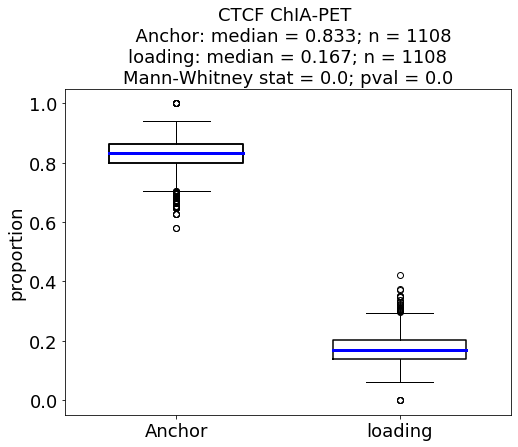

In [150]:
plot_boxplot([x1, x2], ['Anchor', 'loading'], '#0000FF', anchr_title, 'proportion', 'ctcf-chiapet_anchor_vs_loading_boxplot_norm_20201012')

In [151]:
#x1 = [np.log10(x+1) for x in cohesin_anch]
#x2 = [np.log10(x+1) for x in cohesin_load]
x1 = cohesin_anch
x2 = cohesin_load

In [152]:
anchr_stat = scipy.stats.mannwhitneyu(x1, x2)

In [153]:
anchr_title = "Cohesin ChIA-PET \n  Anchor: median = " + str(round(np.median(cohesin_anch), 3)) + "; n = " + str(len(cohesin_anch)) + "\n" + "loading: median = " + str(round(np.median(cohesin_load), 3)) + "; n = " + str(len(cohesin_load)) + "\n" + "Mann-Whitney stat = " + str(anchr_stat[0]) + "; pval = " + str(anchr_stat[1]) 

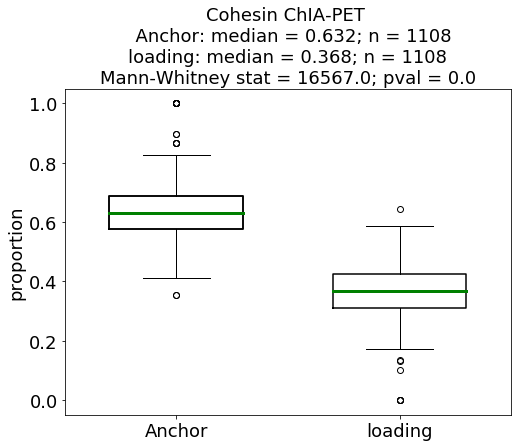

In [154]:
plot_boxplot([x1, x2], ['Anchor', 'loading'], '#008000', anchr_title, 'proportion', 'cohesin-chiapet_anchor_vs_loading_boxplot_norm_20201012')

In [165]:
#x1 = [np.log10(x+1) for x in rnapii_anch]
#x2 = [np.log10(x+1) for x in rnapii_load]
x1 = rnapii_anch
x2 = rnapii_load

In [166]:
anchr_stat = scipy.stats.mannwhitneyu(x1, x2)

In [167]:
anchr_title = "RNAPII ChIA-PET \n  Anchor: median = " + str(round(np.median(rnapii_anch), 3)) + "; n = " + str(len(rnapii_anch)) + "\n" + "loading: median = " + str(round(np.median(rnapii_load), 3)) + "; n = " + str(len(rnapii_load)) + "\n" + "Mann-Whitney stat = " + str(anchr_stat[0]) + "; pval = " + str(anchr_stat[1]) 

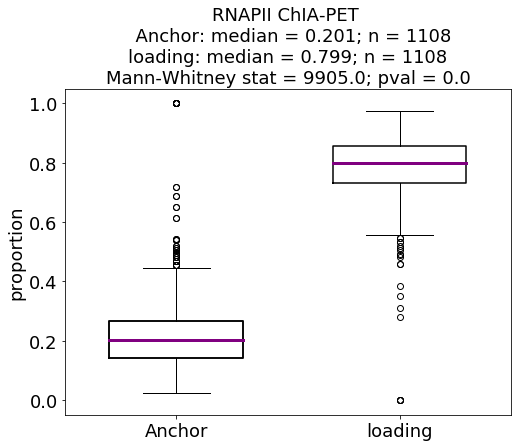

In [168]:
plot_boxplot([x1, x2], ['Anchor', 'loading'], '#800080', anchr_title, 'proportion', 'rnapii-chiapet_anchor_vs_loading_boxplot_norm_20201012')

In [193]:
x1 = ctcfcd_anch
x2 = ctcfcd_load

In [194]:
anchr_stat = scipy.stats.mannwhitneyu(x1, x2)

In [195]:
anchr_title = "CTCF ChIA-Drop \n  Anchor: median = " + str(round(np.median(ctcfcd_anch), 3)) + "; n = " + str(len(ctcfcd_anch)) + "\n" + "loading: median = " + str(round(np.median(ctcfcd_load), 3)) + "; n = " + str(len(ctcfcd_load)) + "\n" + "Mann-Whitney stat = " + str(anchr_stat[0]) + "; pval = " + str(anchr_stat[1]) 

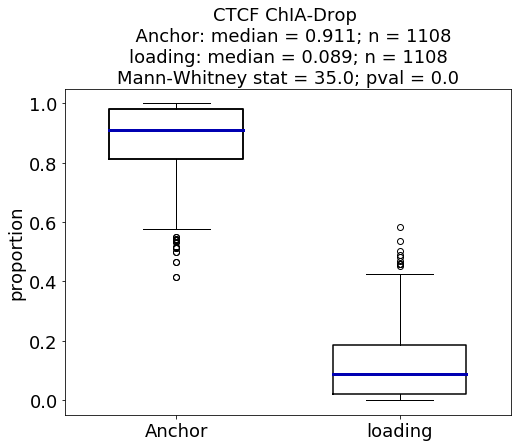

In [196]:
plot_boxplot([x1, x2], ['Anchor', 'loading'], '#0000B2', anchr_title, 'proportion', 'ctcf-chiadrop_anchor_vs_loading_boxplot_norm_20201012')

In [197]:
x1 = cohesincd_anch
x2 = cohesincd_load

In [198]:
anchr_stat = scipy.stats.mannwhitneyu(x1, x2)

In [199]:
anchr_title = "Cohesin ChIA-Drop \n  Anchor: median = " + str(round(np.median(cohesincd_anch), 3)) + "; n = " + str(len(cohesincd_anch)) + "\n" + "loading: median = " + str(round(np.median(cohesincd_load), 3)) + "; n = " + str(len(cohesincd_load)) + "\n" + "Mann-Whitney stat = " + str(anchr_stat[0]) + "; pval = " + str(anchr_stat[1]) 

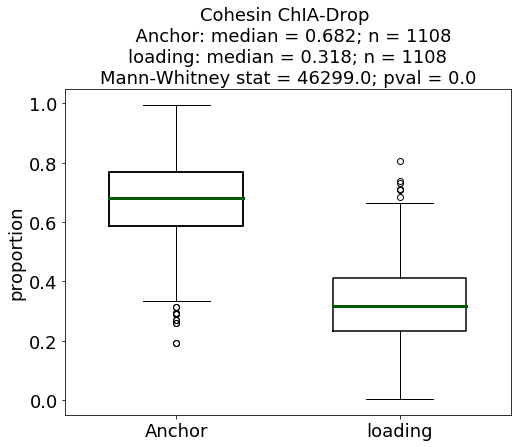

In [200]:
plot_boxplot([x1, x2], ['Anchor', 'loading'], '#005900', anchr_title, 'proportion', 'cohesin-chiadrop_anchor_vs_loading_boxplot_norm_20201012')

In [201]:
x1 = rnapiicd_anch
x2 = rnapiicd_load

In [202]:
anchr_stat = scipy.stats.mannwhitneyu(x1, x2)

In [203]:
anchr_title = "RNAPII ChIA-Drop \n  Anchor: median = " + str(round(np.median(rnapiicd_anch), 3)) + "; n = " + str(len(rnapiicd_anch)) + "\n" + "loading: median = " + str(round(np.median(rnapiicd_load), 3)) + "; n = " + str(len(rnapiicd_load)) + "\n" + "Mann-Whitney stat = " + str(anchr_stat[0]) + "; pval = " + str(anchr_stat[1]) 

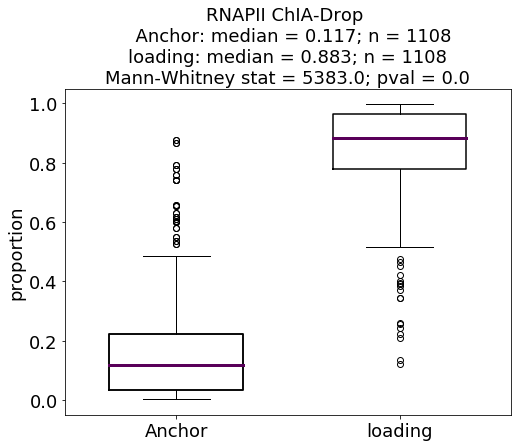

In [204]:
plot_boxplot([x1, x2], ['Anchor', 'loading'], '#590059', anchr_title, 'proportion', 'rnapii-chiadrop_anchor_vs_loading_boxplot_norm_20201012')